**This is a multi-variate linear regression model. Meaning multiple features of a problem statement instead of just one feature as we saw in Single variate linear program model**

In [1]:
#Lets start by step1 of importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Step2: User provide datafile to program in dataframe format
#Here, since I am using google drive as my source of datafiles, I have to permit colab to access MyDrive of google drive.
#This is done via first 2 lines of code.
#Then path is mentioned separately this time so that in coming code lines, we will just replace the file and rest of code remains the same.

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Jupyter_Notebooks/Lin Reg Multivariate/homeprices.csv'
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Step3: Check our file contents
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [14]:
#Here u see that NaN is in 3rd row. So we have to regularise this missing data point by applying median math calculation on it.
import math #math library is imported to do median calculations
median_bedrooms = math.floor(df.bedrooms.median())  #floor division of median is applied on 'bedrooms' column of our file named as df and saved as median_bedrooms variable
median_bedrooms

4

In [15]:
#Ans is 4. Now we have to replace NaN with 4 so that we can do lin reg on our dataset.
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [16]:
#lets check whether NaN is replaced
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [49]:
#Now, lets call linear regression model and fit it on our data.
from sklearn import linear_model
reg = linear_model.LinearRegression()
feature = df[['area', 'bedrooms', 'age']]
price = df.price
reg.fit(feature, price)

LinearRegression()

In [45]:
#So our lin reg model is fit successfully.
#Now lets check our coefficients, intercepts and try with any random input of area,bedrooms,age
reg.coef_  #so 112.06244194 is for area, 23388.88007794 for bedrooms and -3231.71790862 for age

array([  112.06244194, 23388.88007794, -3231.71790863])

In [46]:
reg.intercept_ #so intercept=slope=fixed cost is 221323.00186540396

np.float64(221323.00186540396)

In [47]:
#lets check randomly input of area,bedrooms and age
reg.predict([[3000,3,40]])  #3000 area, 3 bedrooms, 40 years of age

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [76]:
#Lets try to plot some graphs with seaborn library.
#Since there are multiple features as X and target y is price, so we will have 3 graphs. Each with y.
#First, lets give a separate variable houseprice_data meaning all columns of our csv file coz we gonna apply seaborn(sns) for graphs
houseprice_data = df[['area', 'bedrooms', 'age', 'price']]

In [77]:
#then we will create list of features as x and target as y
features = ['area', 'bedrooms', 'age']
target = 'price'

In [78]:
#importing seaborn libray before using it below
import seaborn as sns

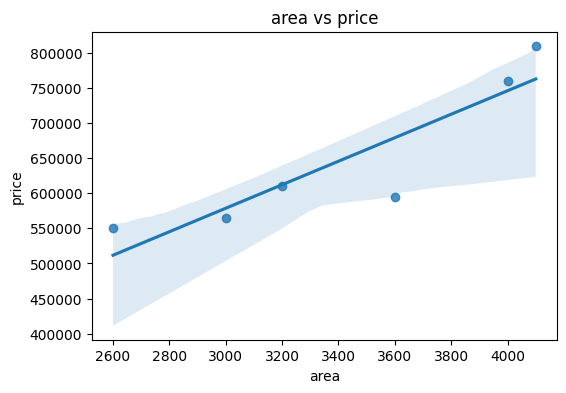

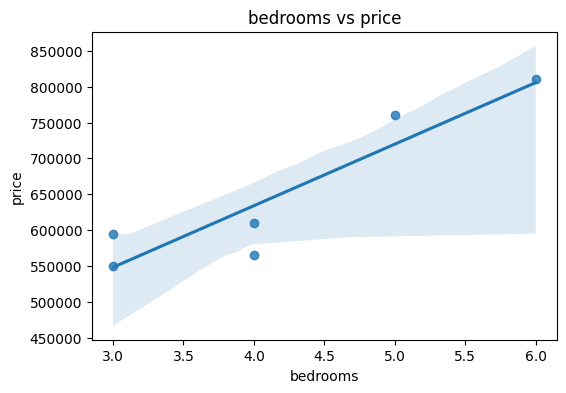

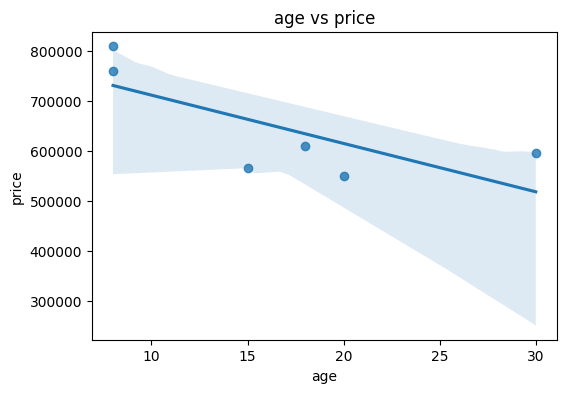

In [79]:
#using for loop for all x features onebyone with target price and simultaneausly, it will plot the grapns
for feature in features:
  plt.figure(figsize=(6,4))
  sns.regplot(x=feature, y=target, data=houseprice_data)
  #sns.regplot(x=feature, y=target, data=df)
  plt.title(f'{feature} vs price')
  plt.show()

In [80]:
#Conclusion: Price should normally increase with area and bedrooms but there is an inverse
#   relationship with age.

In [81]:
#Hope you enjoyed this and also liking the code with explanation so that you can also learn while
#  coding without video help. Surely, I have taken help of Chatbots and codebasics video tutorials.

In [82]:
#Please comment on my profile of github, or any space you find to improve it further.

In [83]:
##THANKS